<h1 align='center'>Car prices Poland</h1>

<h5 align="right">@aiskido</h5>

<h3>Importing the packages</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import explained_variance_score, r2_score

<h3>Reading the dataset CSV</h3>

In [2]:
Cars = pd.read_csv('Car_Prices_Poland_Kaggle.csv')
Cars

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900
...,...,...,...,...,...,...,...,...,...,...,...
117922,117922,volvo,xc-90,gen-ii-2014-xc-90,2020,40000,1969,Hybrid,Katowice,Śląskie,222790
117923,117923,volvo,xc-90,gen-ii-2014-xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie,229900
117924,117924,volvo,xc-90,gen-ii-2014-xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie,135000
117925,117925,volvo,xc-90,gen-ii-2014-xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie,154500


In [3]:
Cars.shape

(117927, 11)

In [4]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


<h3>Data Preprocessing</h3>

In [5]:
Cars.isnull().sum()

Unnamed: 0             0
mark                   0
model                  0
generation_name    30085
year                   0
mileage                0
vol_engine             0
fuel                   0
city                   0
province               0
price                  0
dtype: int64

In [6]:
# delete column 'unnamed' because it has not important information
Cars.drop('Unnamed: 0', axis=1, inplace = True)

<h4>Working with 'generation_name'</h4>

For now I decided to drop all NaNs, but in the future I will work with them

In [7]:
Cars.drop(Cars[Cars['generation_name'].isnull()].index, inplace=True)
Cars.isnull().sum()

mark               0
model              0
generation_name    0
year               0
mileage            0
vol_engine         0
fuel               0
city               0
province           0
price              0
dtype: int64

In [8]:
Cars.shape

(87842, 10)

In [9]:
# unique values in each columns after some works
for i in Cars.columns:
    print("\nColumn:", i)
    print(np.sort(Cars[i].unique()))
    print("The amount of values:", Cars[i].unique().size)


Column: mark
['audi' 'bmw' 'citroen' 'fiat' 'ford' 'honda' 'hyundai' 'kia' 'mazda'
 'mercedes-benz' 'mitsubishi' 'nissan' 'opel' 'peugeot' 'renault' 'seat'
 'skoda' 'toyota' 'volkswagen' 'volvo']
The amount of values: 20

Column: model
['2' '3' '3008' '5' '5008' '6' '80' 'a-klasa' 'a3' 'a4' 'a5' 'a6'
 'a6-allroad' 'a7' 'a8' 'accord' 'agila' 'alhambra' 'almera' 'astra'
 'auris' 'avensis' 'aygo' 'b-klasa' 'berlingo' 'bravo' 'c-klasa' 'c-max'
 'c4-picasso' 'c5' 'caddy' 'carens' 'ceed' 'civic' 'cl-klasa' 'clio'
 'clk-klasa' 'cls-klasa' 'colt' 'combo' 'corolla' 'corsa' 'cr-v' 'doblo'
 'e-klasa' 'elantra' 'espace' 'fabia' 'fiesta' 'focus' 'frontera'
 'g-klasa' 'galaxy' 'gl-klasa' 'gle-klasa' 'golf' 'grand-scenic' 'hr-v'
 'i10' 'i20' 'i30' 'ibiza' 'insignia' 'jazz' 'jetta' 'juke' 'ka' 'kangoo'
 'kuga' 'laguna' 'lancer' 'land-cruiser' 'leon' 'm-klasa' 'megane'
 'meriva' 'micra' 'mondeo' 'note' 'octavia' 'omega' 'outlander' 'panda'
 'partner' 'passat' 'patrol' 'picanto' 'polo' 'primera' 'prius

<h4>I mentioned that there are exist repeated datas</h4>

In [10]:
Cars = Cars.drop_duplicates()
Cars = Cars.reset_index(drop=True)

In [11]:
#This part is to delete duplicates that same in such columns:
Cars = Cars.drop_duplicates(subset=['mark', 'model', 'generation_name','year','city','province'])
Cars = Cars.reset_index(drop=True)

In [12]:
Cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61916 entries, 0 to 61915
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   mark             61916 non-null  object
 1   model            61916 non-null  object
 2   generation_name  61916 non-null  object
 3   year             61916 non-null  int64 
 4   mileage          61916 non-null  int64 
 5   vol_engine       61916 non-null  int64 
 6   fuel             61916 non-null  object
 7   city             61916 non-null  object
 8   province         61916 non-null  object
 9   price            61916 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 4.7+ MB


<h3>Data Visualization</h3>

<AxesSubplot:>

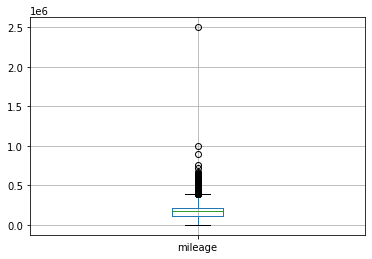

In [13]:
Cars.boxplot('mileage')

<AxesSubplot:>

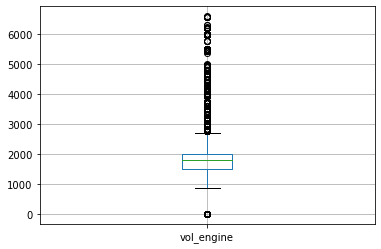

In [14]:
Cars.boxplot('vol_engine')

<AxesSubplot:ylabel='Frequency'>

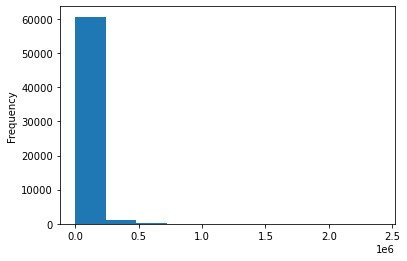

In [15]:
Cars['price'].plot(kind = 'hist')

In [16]:
Cars.corr()

,year,mileage,vol_engine,price
year,1.000000,-0.644960,-0.159891,0.571787
mileage,-0.644960,1.000000,0.226201,-0.466141
vol_engine,-0.159891,0.226201,1.000000,0.331040
price,0.571787,-0.466141,0.331040,1.000000


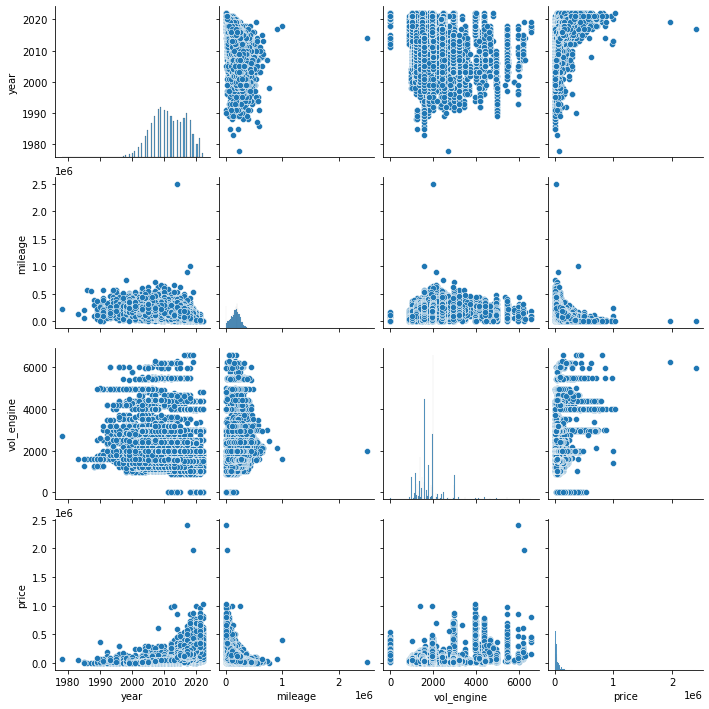

In [17]:
sns.pairplot(Cars)

<h3>Working with sample by 'year'</h3>

For now I decided to work with years between 2019 and 2021, because it will be a little better to work with a small amount of data. So I take a sample from my whole dataset without such columns as 'city' and 'generation_name'.

In [18]:
cars = Cars[Cars['year'].between(2019, 2021, inclusive = 'both')]
cars = cars.reset_index(drop=True)
cars.drop('city', axis = 1, inplace=True)
cars.drop('generation_name', axis = 1, inplace=True)
cars

,mark,model,year,mileage,vol_engine,fuel,province,price
0,opel,astra,2019,50080,1399,Gasoline,Dolnośląskie,75500
1,opel,astra,2019,57256,1399,Gasoline,Mazowieckie,68300
2,opel,astra,2019,44861,1399,Gasoline,Śląskie,75500
3,opel,astra,2019,17600,1364,Gasoline,Dolnośląskie,54900
4,opel,astra,2021,6,1199,Gasoline,Śląskie,95900
...,...,...,...,...,...,...,...,...
4984,volvo,xc-90,2021,17185,1969,Hybrid,Wielkopolskie,274900
4985,volvo,xc-90,2019,69000,1969,Diesel,Warmińsko-mazurskie,269000
4986,volvo,xc-90,2021,10,1969,Hybrid,Mazowieckie,489500
4987,volvo,xc-90,2020,25600,1969,Diesel,Warmińsko-mazurskie,329000


In [19]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mark        4989 non-null   object
 1   model       4989 non-null   object
 2   year        4989 non-null   int64 
 3   mileage     4989 non-null   int64 
 4   vol_engine  4989 non-null   int64 
 5   fuel        4989 non-null   object
 6   province    4989 non-null   object
 7   price       4989 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 311.9+ KB


<h3>Data split train and test</h3>

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = pd.get_dummies(cars, columns=['mark', 'model', 'fuel', 'province'])
X

,year,mileage,vol_engine,price,mark_audi,mark_bmw,mark_citroen,mark_fiat,mark_ford,mark_honda,...,province_Podkarpackie,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie
0,2019,50080,1399,75500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,57256,1399,68300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019,44861,1399,75500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2019,17600,1364,54900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,6,1199,95900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,2021,17185,1969,274900,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4985,2019,69000,1969,269000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4986,2021,10,1969,489500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4987,2020,25600,1969,329000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [22]:
X.drop('year', axis = 1, inplace=True)

In [23]:
y = cars['year']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [25]:
X_train

,mileage,vol_engine,price,mark_audi,mark_bmw,mark_citroen,mark_fiat,mark_ford,mark_honda,mark_hyundai,...,province_Podkarpackie,province_Podlaskie,province_Pomorskie,province_Trenczyn,province_Warmińsko-mazurskie,province_Wielkopolskie,province_Zachodniopomorskie,province_Łódzkie,province_Śląskie,province_Świętokrzyskie
1147,47700,1499,112500,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4381,32000,1998,91500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1714,526469,1984,97170,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236,1000,1995,159900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4579,105000,1332,78900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,43550,1798,92900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2763,5,1332,97900,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
905,90580,1995,179000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3980,37786,1591,99000,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [26]:
print(f'TRAIN: {X_train.shape} | {y_train.shape}\nTEST: {X_test.shape} | {y_test.shape}')

TRAIN: (3991, 162) | (3991,)
TEST: (998, 162) | (998,)


<b>And for regression as rg</b>

In [27]:
X_rg = pd.get_dummies(cars, columns=['mark', 'model', 'fuel', 'province'])

In [28]:
X_rg.drop('vol_engine', axis=1, inplace=True)

In [29]:
y_rg = cars['vol_engine']

In [30]:
X_train_rg, X_test_rg, y_train_rg, y_test_rg = train_test_split(X_rg, y_rg, test_size=0.2, random_state = 1)

In [31]:
print(f'TRAIN: {X_train_rg.shape} | {y_train_rg.shape}\nTEST: {X_test_rg.shape} | {y_test_rg.shape}')

TRAIN: (3991, 162) | (3991,)
TEST: (998, 162) | (998,)


<h3>KNN part</h3>

<h4>Classification</h4>

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_preds = knn.predict(X_test)

In [36]:
accuracy_score(y_test, y_preds)

0.7004008016032064

In [37]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

        2019       0.69      0.80      0.74       420
        2020       0.47      0.37      0.41       251
        2021       0.86      0.83      0.84       327

    accuracy                           0.70       998
   macro avg       0.67      0.66      0.67       998
weighted avg       0.69      0.70      0.69       998



In [38]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

        2019       0.72      0.77      0.74       420
        2020       0.47      0.40      0.43       251
        2021       0.81      0.82      0.81       327

    accuracy                           0.69       998
   macro avg       0.66      0.66      0.66       998
weighted avg       0.68      0.69      0.69       998



In [39]:
for k in [7,17,31,37,41]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f'{k} NEIGHBORS')
    print(classification_report(y_test, y_pred))

7 NEIGHBORS
              precision    recall  f1-score   support

        2019       0.73      0.84      0.78       420
        2020       0.52      0.44      0.48       251
        2021       0.87      0.82      0.84       327

    accuracy                           0.73       998
   macro avg       0.71      0.70      0.70       998
weighted avg       0.72      0.73      0.72       998

17 NEIGHBORS
              precision    recall  f1-score   support

        2019       0.74      0.83      0.79       420
        2020       0.54      0.44      0.48       251
        2021       0.85      0.84      0.85       327

    accuracy                           0.74       998
   macro avg       0.71      0.70      0.71       998
weighted avg       0.73      0.74      0.73       998

31 NEIGHBORS
              precision    recall  f1-score   support

        2019       0.75      0.84      0.79       420
        2020       0.54      0.40      0.46       251
        2021       0.83      0.87    

<b>Here the best result was with 37 neighbors, and also mention that 2020 value result of precision and recall a little small that others but nevertheless not bad</b>

<h4>Regression</h4>

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
neigh = KNeighborsRegressor(n_neighbors=3)

In [42]:
neigh.fit(X_train_rg, y_train_rg)

KNeighborsRegressor(n_neighbors=3)

In [43]:
y_preds_rg = neigh.predict(X_test_rg)

In [44]:
print(r2_score(y_test_rg, y_preds_rg))

0.443040587278448


In [45]:
neigh = KNeighborsRegressor(n_neighbors=3, weights='distance')
neigh.fit(X_train_rg, y_train_rg)
y_preds_rg = neigh.predict(X_test_rg)
print(r2_score(y_test_rg, y_preds_rg))

0.40979835316040614


In [46]:
for k in [7,17,37,57, 61, 65, 69]:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train_rg, y_train_rg)
    y_pred = neigh.predict(X_test_rg)
    print(f'\n{k} NEIGHBORS')
    print(r2_score(y_test_rg, y_pred))


7 NEIGHBORS
0.5269595821966615

17 NEIGHBORS
0.5372485423877499

37 NEIGHBORS
0.5441786696814752

57 NEIGHBORS
0.5481333504155432

61 NEIGHBORS
0.549716937435767

65 NEIGHBORS
0.5499770348215741

69 NEIGHBORS
0.5496107949106195


<b>Here we take the good result as 0.5499 with number of neighbors 65. And to sum up the result at both KNN with classification and regression the best results were with big k neighbors, I guess the reason is that I take year and values are a little away from center value that was taken as default, so it means that neighbors of my values are little bit far away.</b>

<hr>

<h3>SVM part</h3>

<h4>Classification</h4>

In [47]:
from sklearn import svm
from sklearn.svm import SVR

In [48]:
clf = svm.SVC()

In [49]:
clf.fit(X_train, y_train)

SVC()

In [50]:
print(clf.score(X_train, y_train))

0.7203708343773491


In [51]:
y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

        2019       0.78      0.83      0.81       420
        2020       0.55      0.28      0.37       251
        2021       0.72      0.92      0.81       327

    accuracy                           0.72       998
   macro avg       0.68      0.68      0.66       998
weighted avg       0.70      0.72      0.70       998



Now let's try some other parameter

In [52]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

        2019       0.81      0.81      0.81       420
        2020       0.54      0.43      0.48       251
        2021       0.78      0.90      0.83       327

    accuracy                           0.74       998
   macro avg       0.71      0.71      0.71       998
weighted avg       0.73      0.74      0.74       998



Yea, now result is better

In [53]:
clf = svm.SVC(C=2.0, kernel='linear')
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

        2019       0.81      0.81      0.81       420
        2020       0.54      0.43      0.47       251
        2021       0.77      0.89      0.83       327

    accuracy                           0.74       998
   macro avg       0.71      0.71      0.71       998
weighted avg       0.73      0.74      0.73       998



<b>So, as we can see C as 2 doesn't give significant changes. But nevertheless SVM showed good results as in KNN classification</b>

<h4>Regression</h4>

In [54]:
regr = svm.SVR()

In [55]:
regr.fit(X_train_rg, y_train_rg)

SVR()

In [56]:
print(regr.score(X_train_rg, y_train_rg))

0.2927524688144495


In [57]:
y_pred_rg = regr.predict(X_test_rg)

In [58]:
print(r2_score(y_test_rg, y_pred_rg))

0.28657620180262344


<b>In conclusion, regression doesn't give good results as in classification. So the regression of KNN was better.</b>

<hr>

<h3>Decision Tree</h3>

In [59]:
from sklearn import tree
from sklearn import metrics

<h4>Classification</h4>

In [60]:
clf = tree.DecisionTreeClassifier()

In [61]:
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier()

In [62]:
y_pred = clf.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        2019       0.77      0.73      0.75       420
        2020       0.47      0.51      0.49       251
        2021       0.80      0.80      0.80       327

    accuracy                           0.70       998
   macro avg       0.68      0.68      0.68       998
weighted avg       0.71      0.70      0.70       998



So here we can see that DSTree showing not bad result, but nevertheless little small in compare KNN and SVM classification

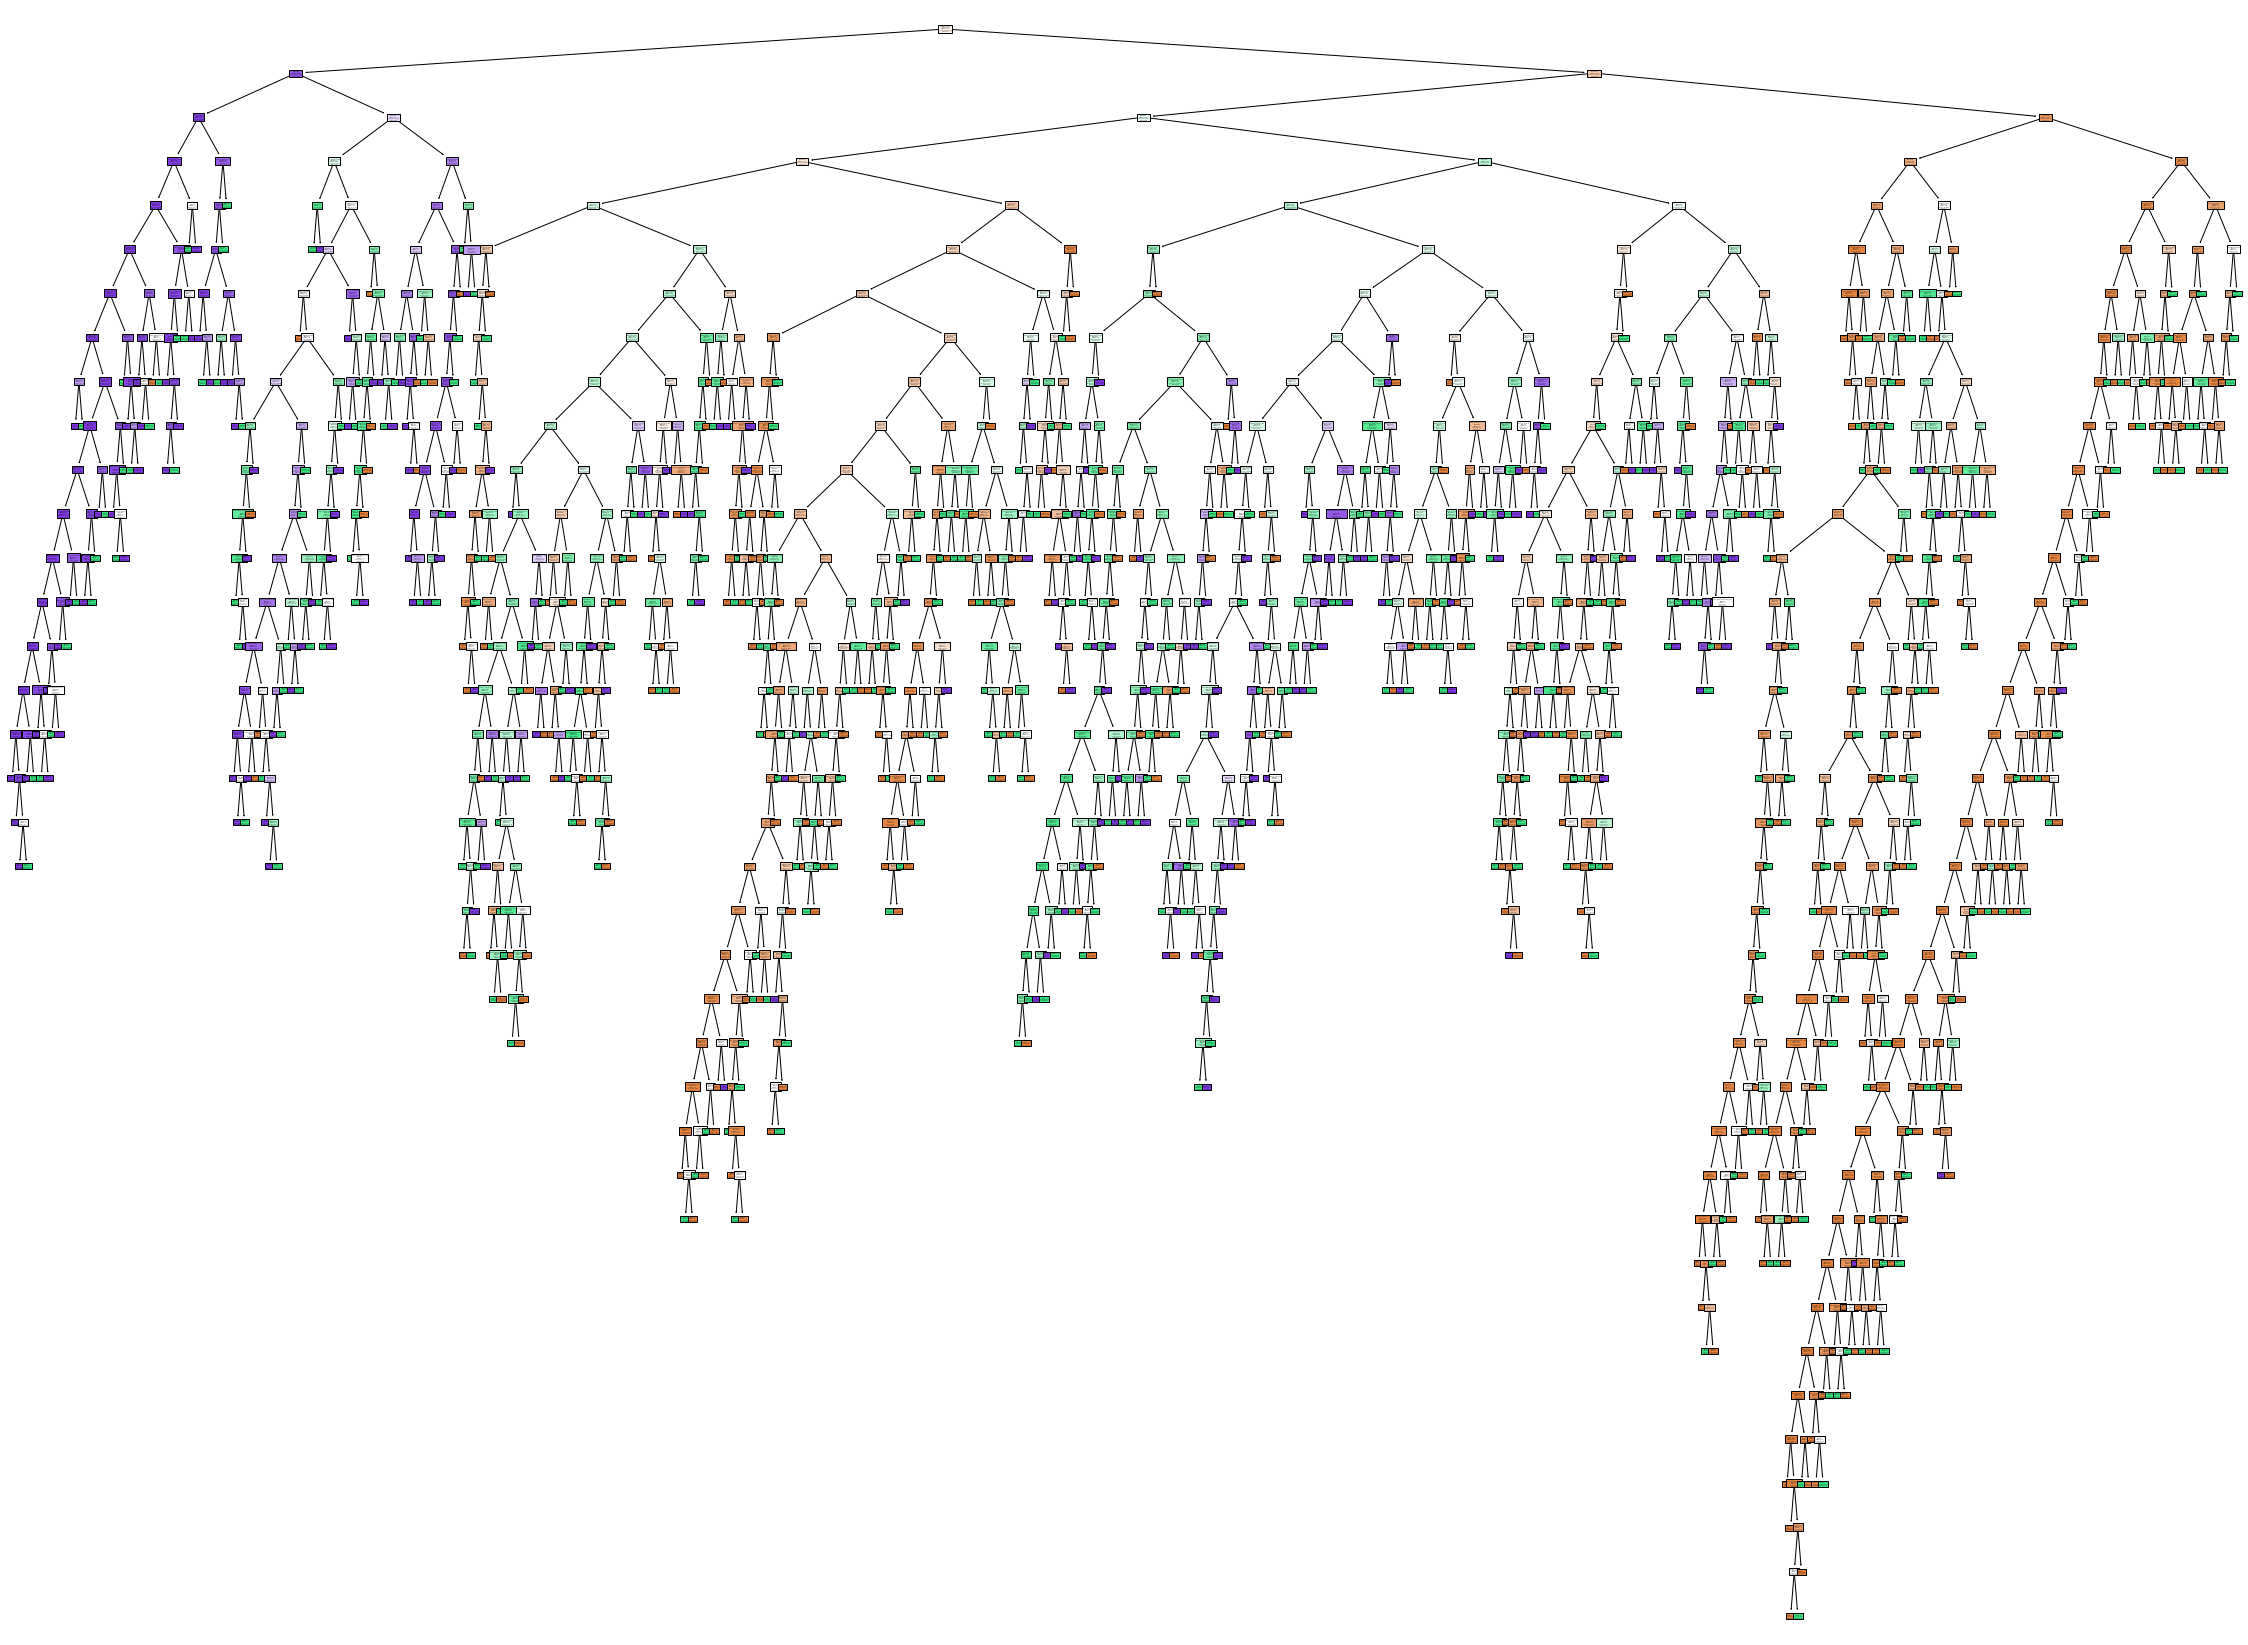

In [64]:
fig = plt.figure(figsize=(40,30)) 
_ = tree.plot_tree(clf, feature_names=X.columns, class_names=y.astype(str), filled=True)

              precision    recall  f1-score   support

        2019       0.76      0.71      0.73       420
        2020       0.44      0.45      0.44       251
        2021       0.80      0.84      0.82       327

    accuracy                           0.69       998
   macro avg       0.67      0.67      0.67       998
weighted avg       0.69      0.69      0.69       998



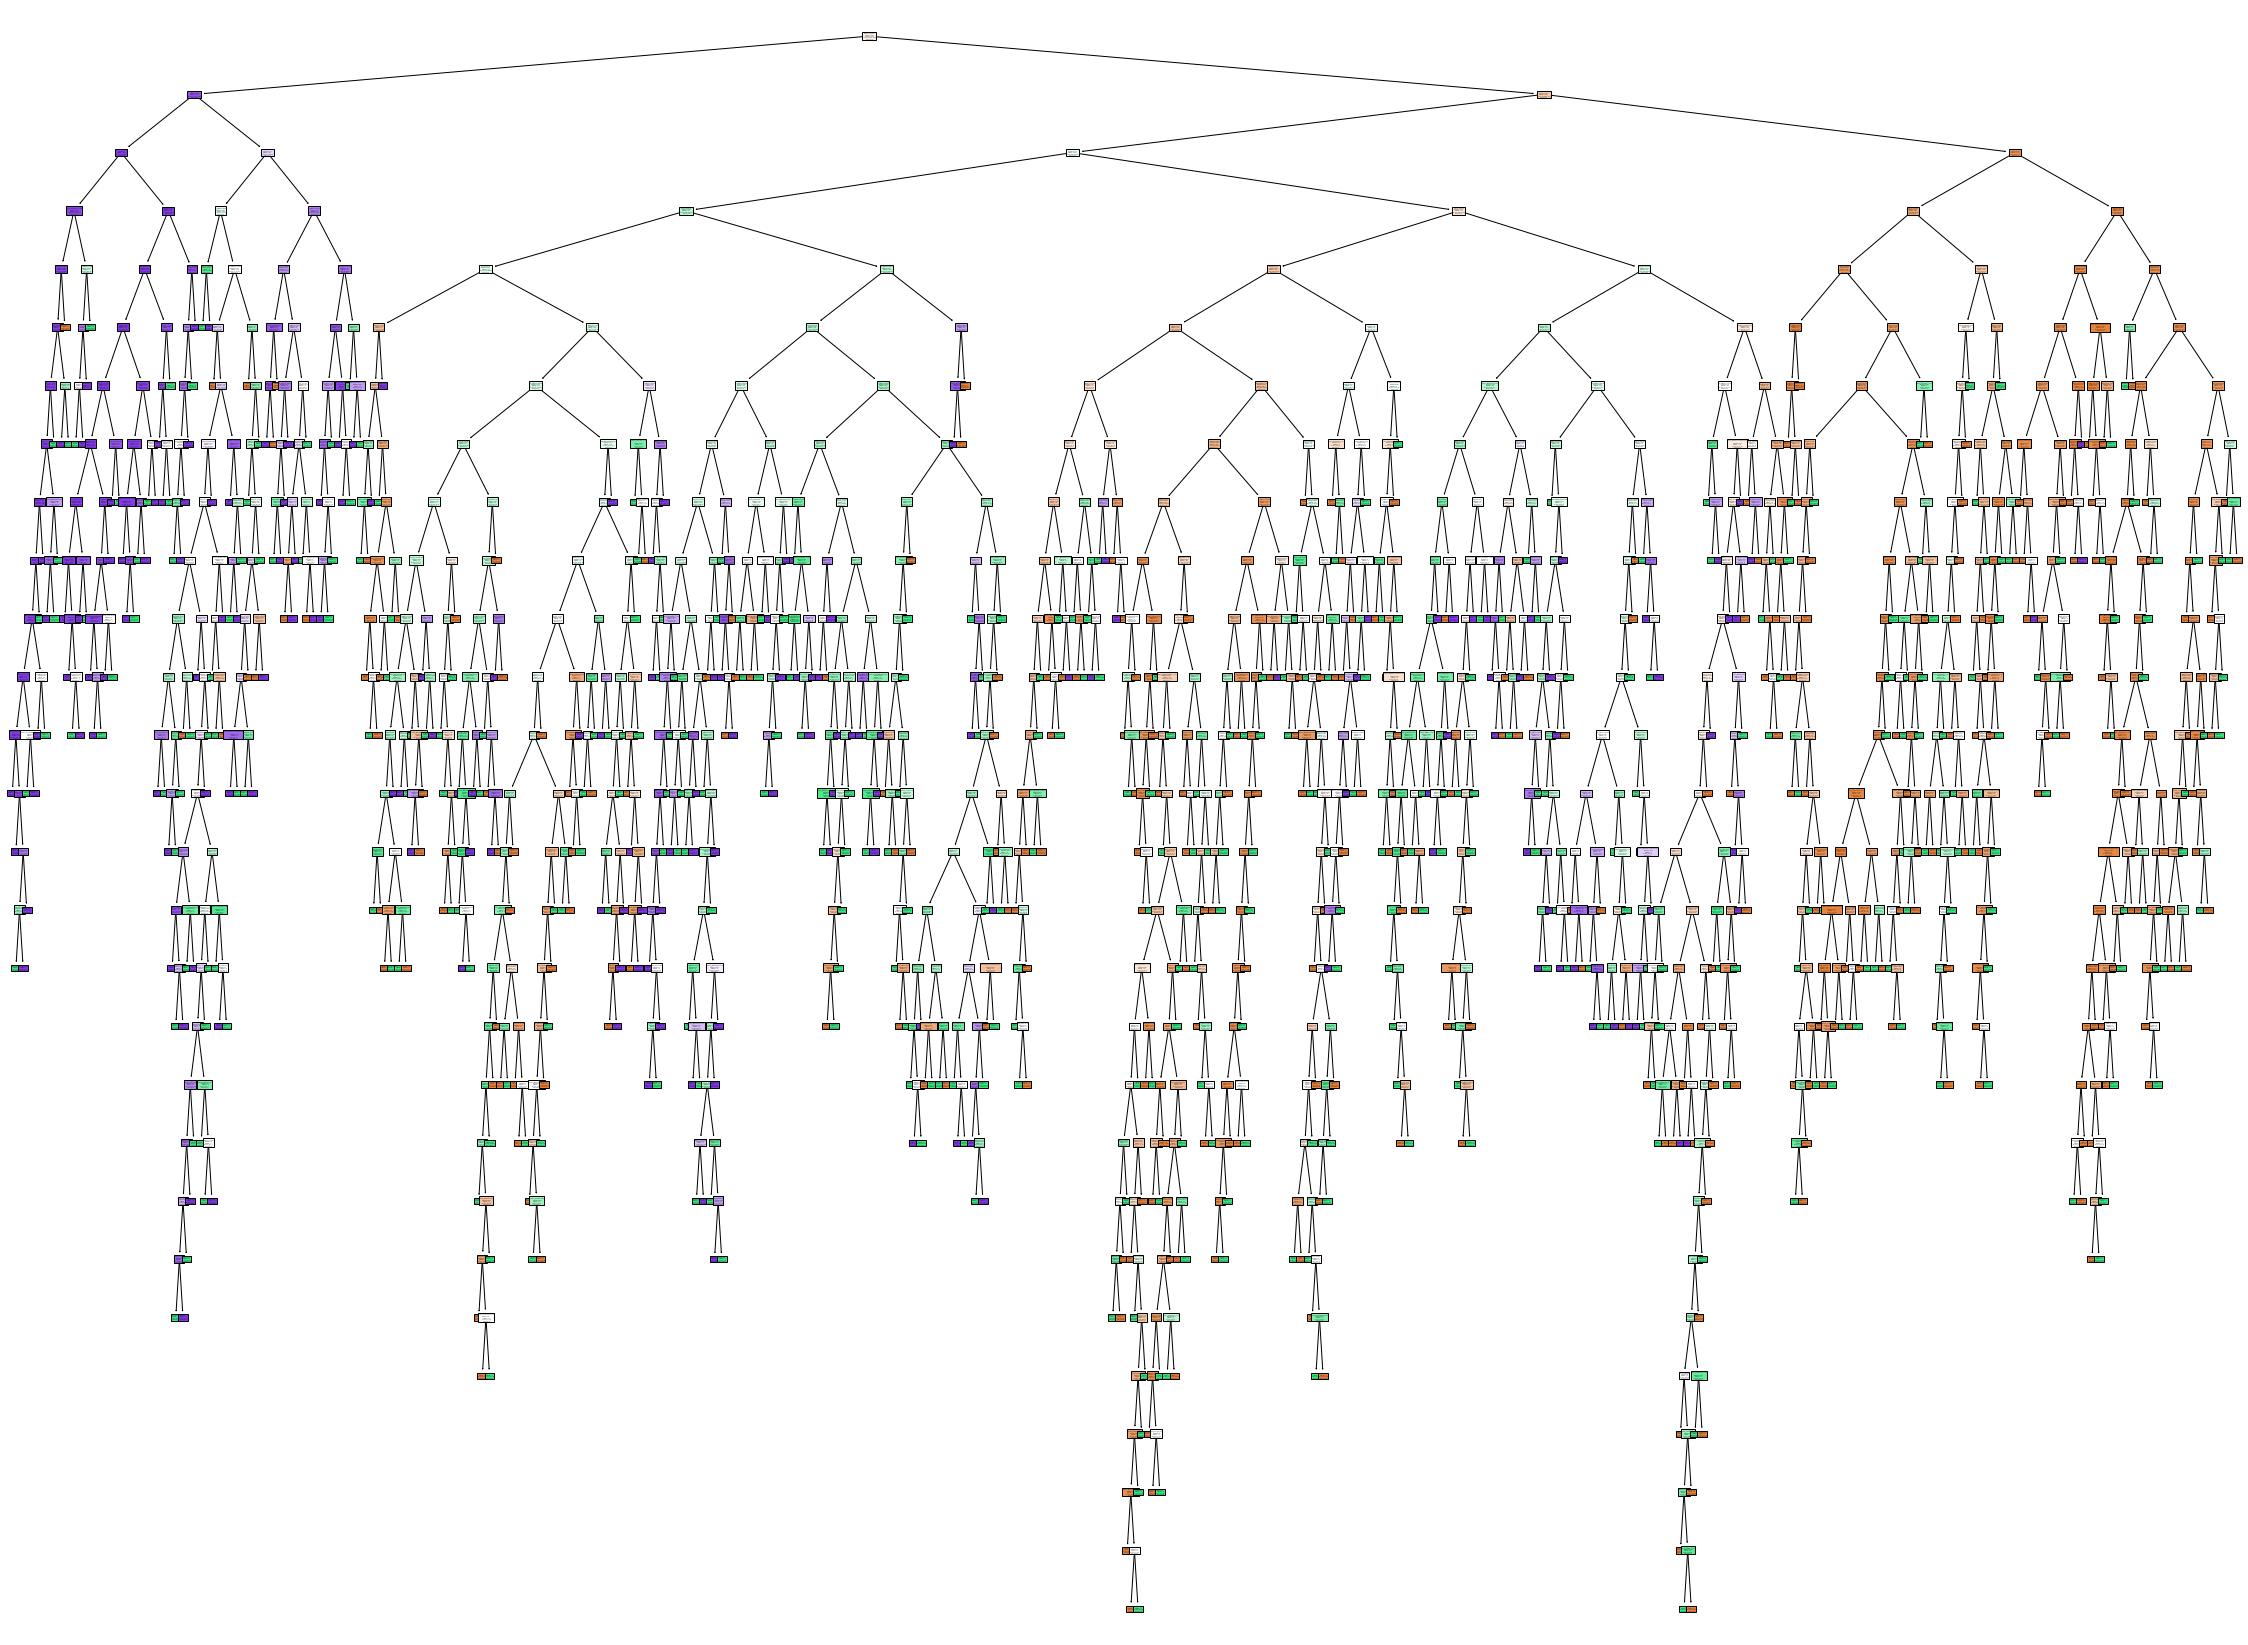

In [65]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy')
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print(classification_report(y_test, y_pred1))
fig = plt.figure(figsize=(40,30))
_1 = tree.plot_tree(clf1, feature_names=X.columns, class_names=y.astype(str), filled=True)

The results with criterion as 'entropy' was worse than with gini, so I decided to use max_depth with gini to test more

              precision    recall  f1-score   support

        2019       0.72      0.88      0.79       420
        2020       0.53      0.45      0.48       251
        2021       0.93      0.78      0.85       327

    accuracy                           0.74       998
   macro avg       0.73      0.70      0.71       998
weighted avg       0.74      0.74      0.73       998



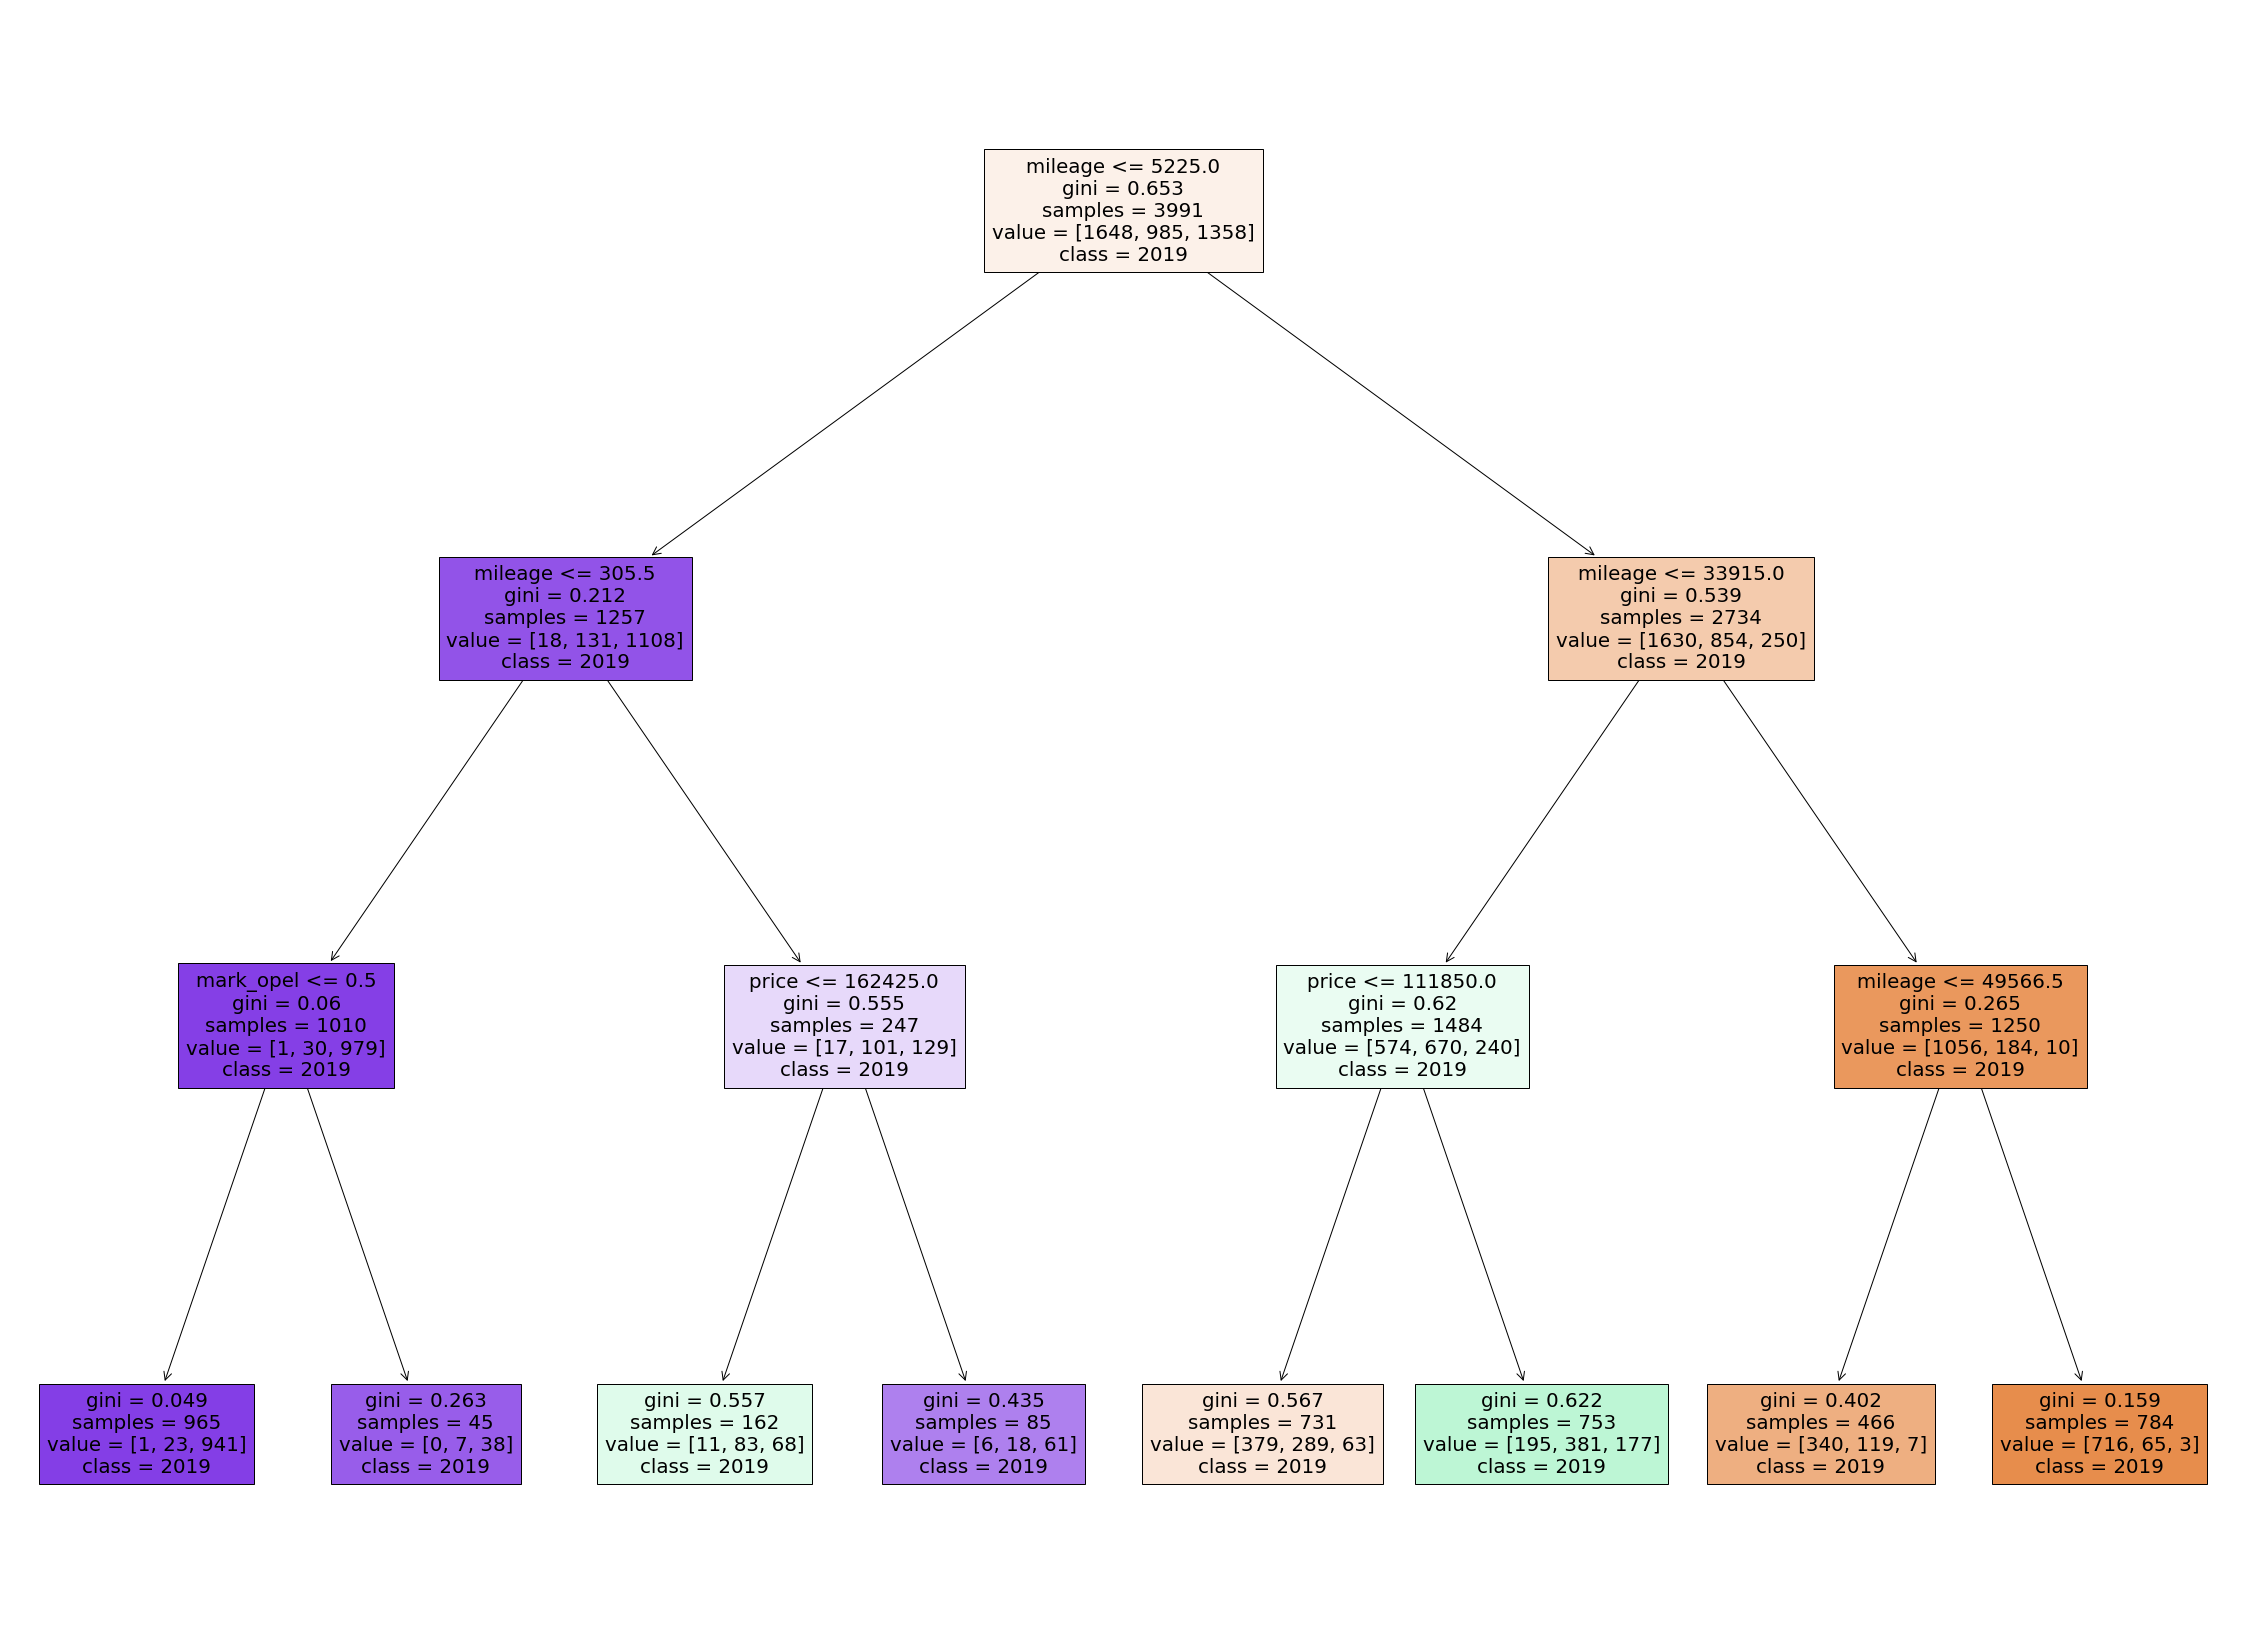

In [66]:
clf2 = tree.DecisionTreeClassifier(max_depth=3)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
print(classification_report(y_test, y_pred2))
fig = plt.figure(figsize=(40,30))
_2 = tree.plot_tree(clf2, feature_names=X.columns, class_names=y.astype(str), filled=True)

<b>So, with this case I can say that my model trained better</b>

<h4>Regression</h4>

In [67]:
reg = tree.DecisionTreeRegressor()

In [68]:
reg = reg.fit(X_train_rg, y_train_rg)

In [69]:
y_pred_rg = reg.predict(X_test_rg)

In [70]:
# Accuracy of the model
r2_score(y_test_rg, y_pred_rg)

0.7800305816739271

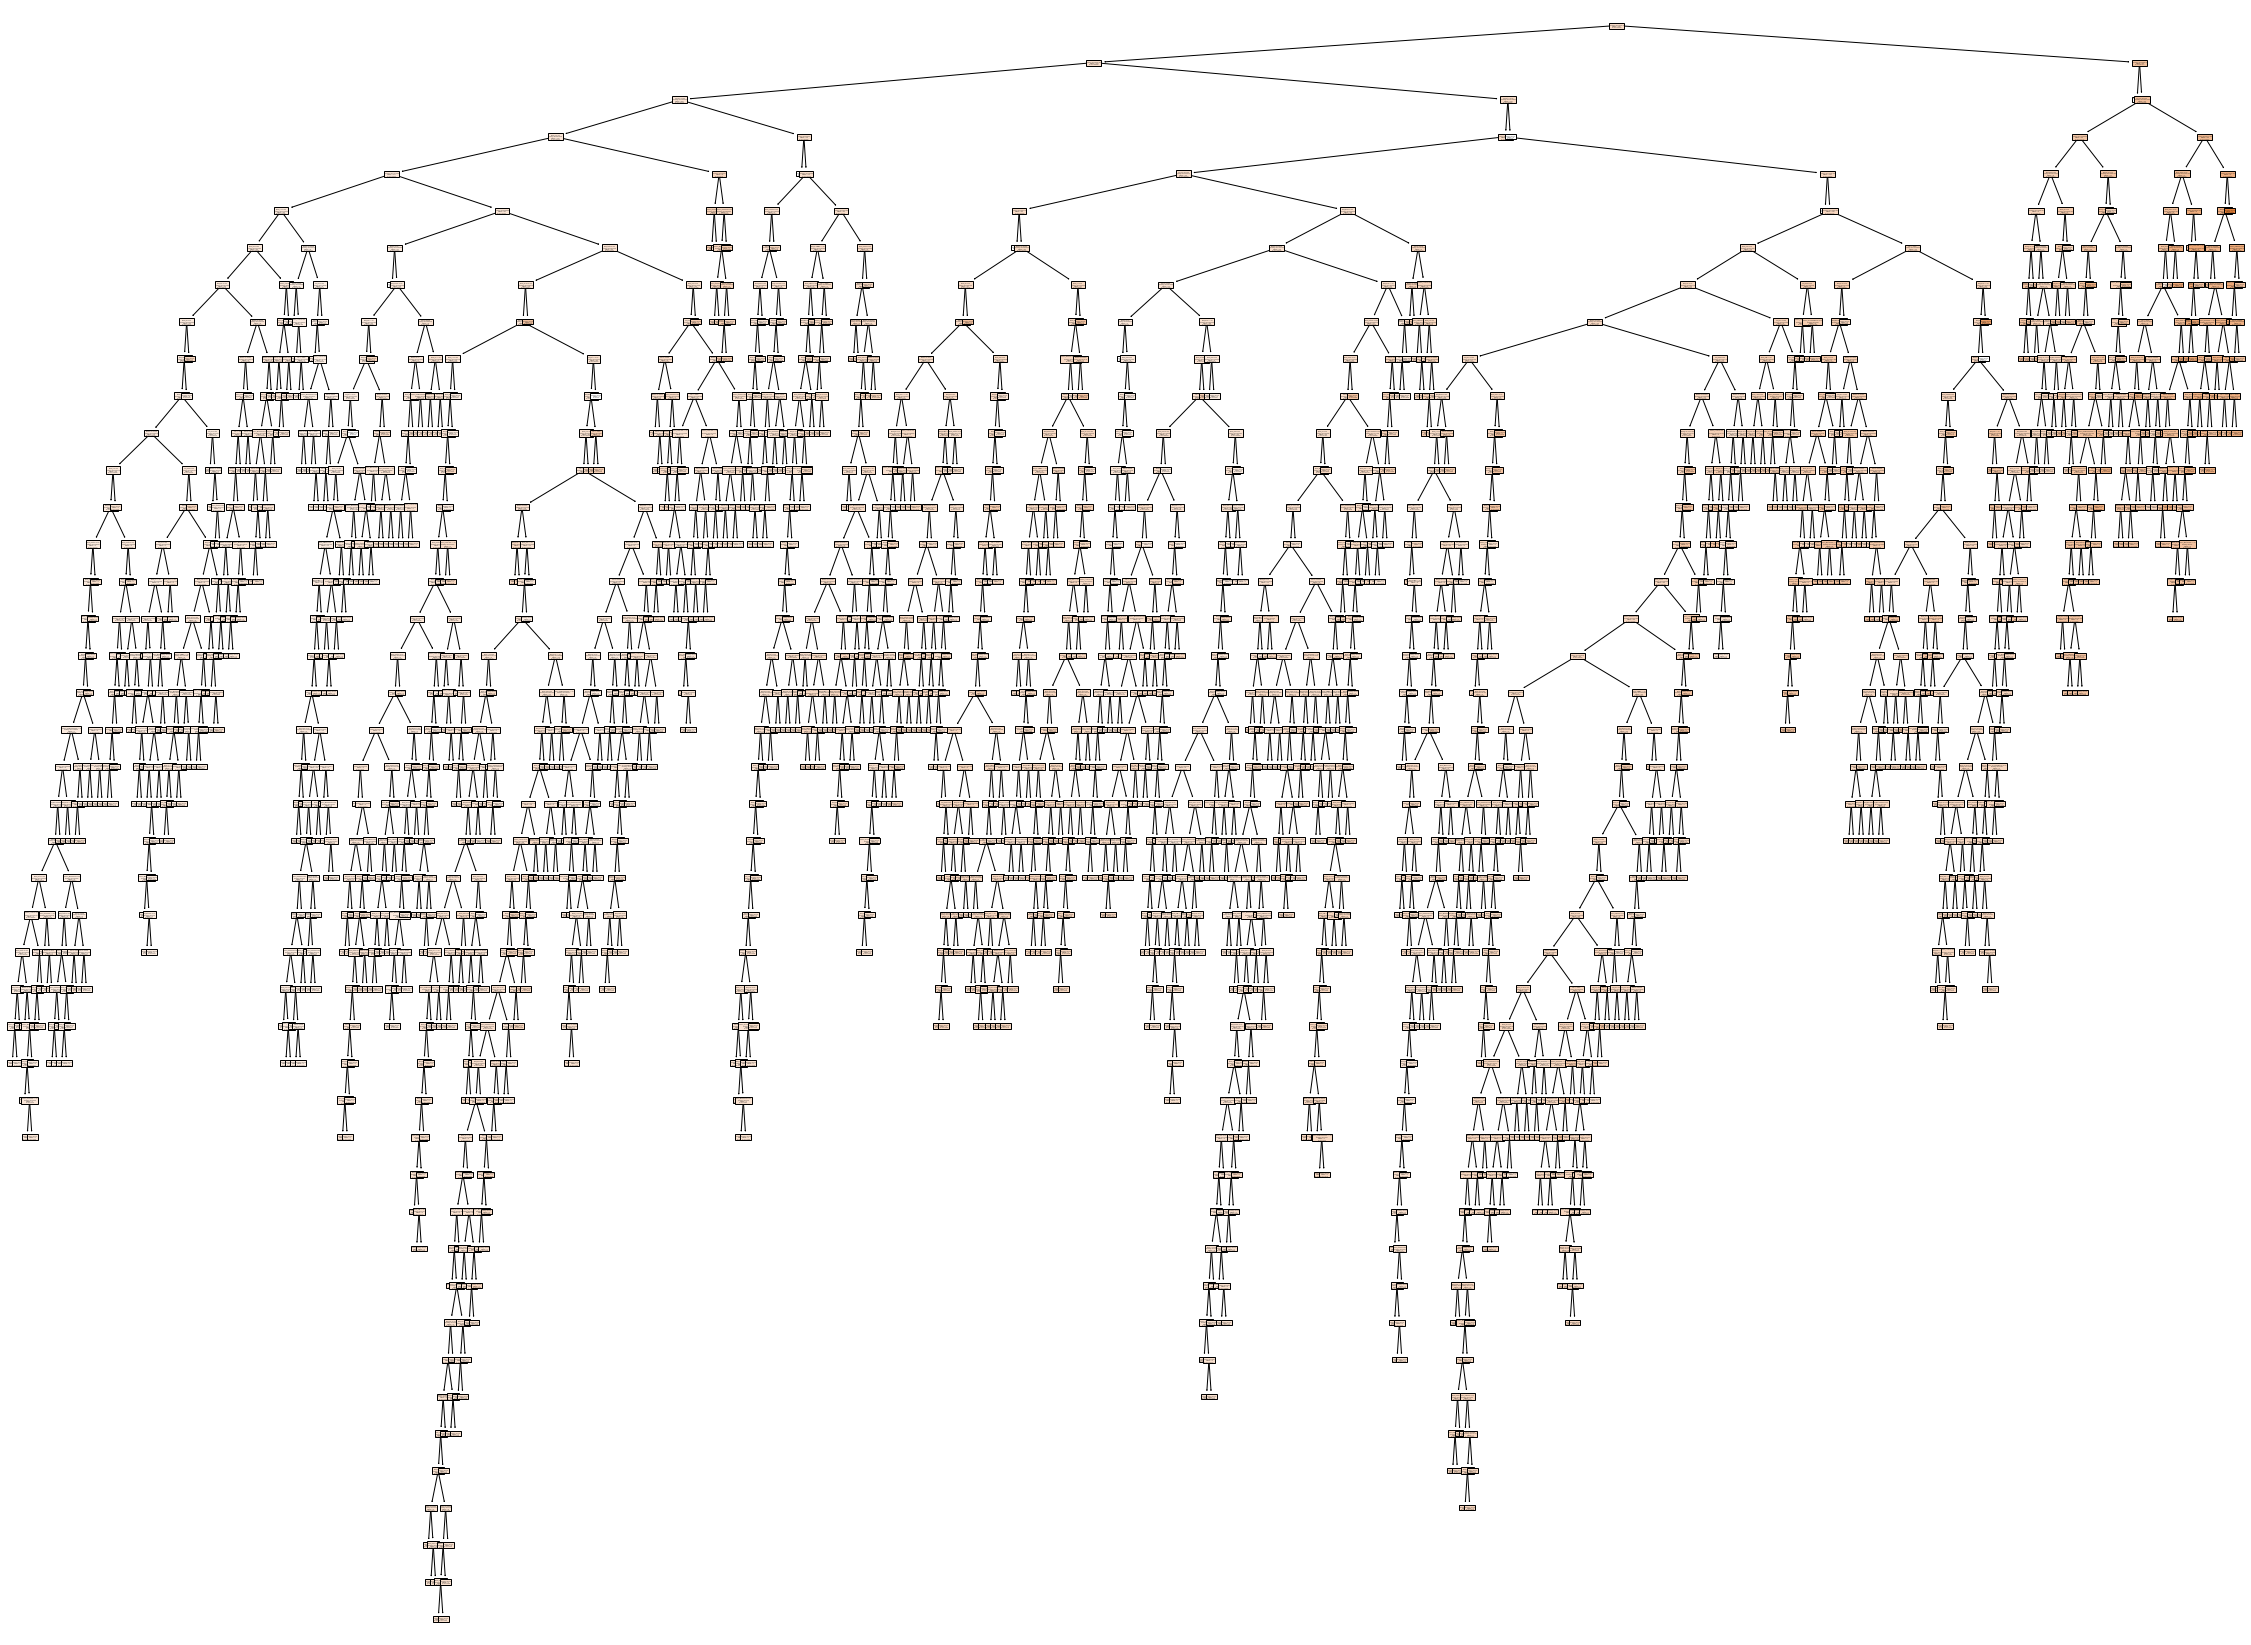

In [71]:
fig = plt.figure(figsize=(40,30)) 
_ = tree.plot_tree(reg, feature_names=X_rg.columns, class_names=y.astype(str), filled=True)

In regression my model gave me result as 0.7739, and let's try it with max_depth

Accuracy of the model: 0.7836545528043947


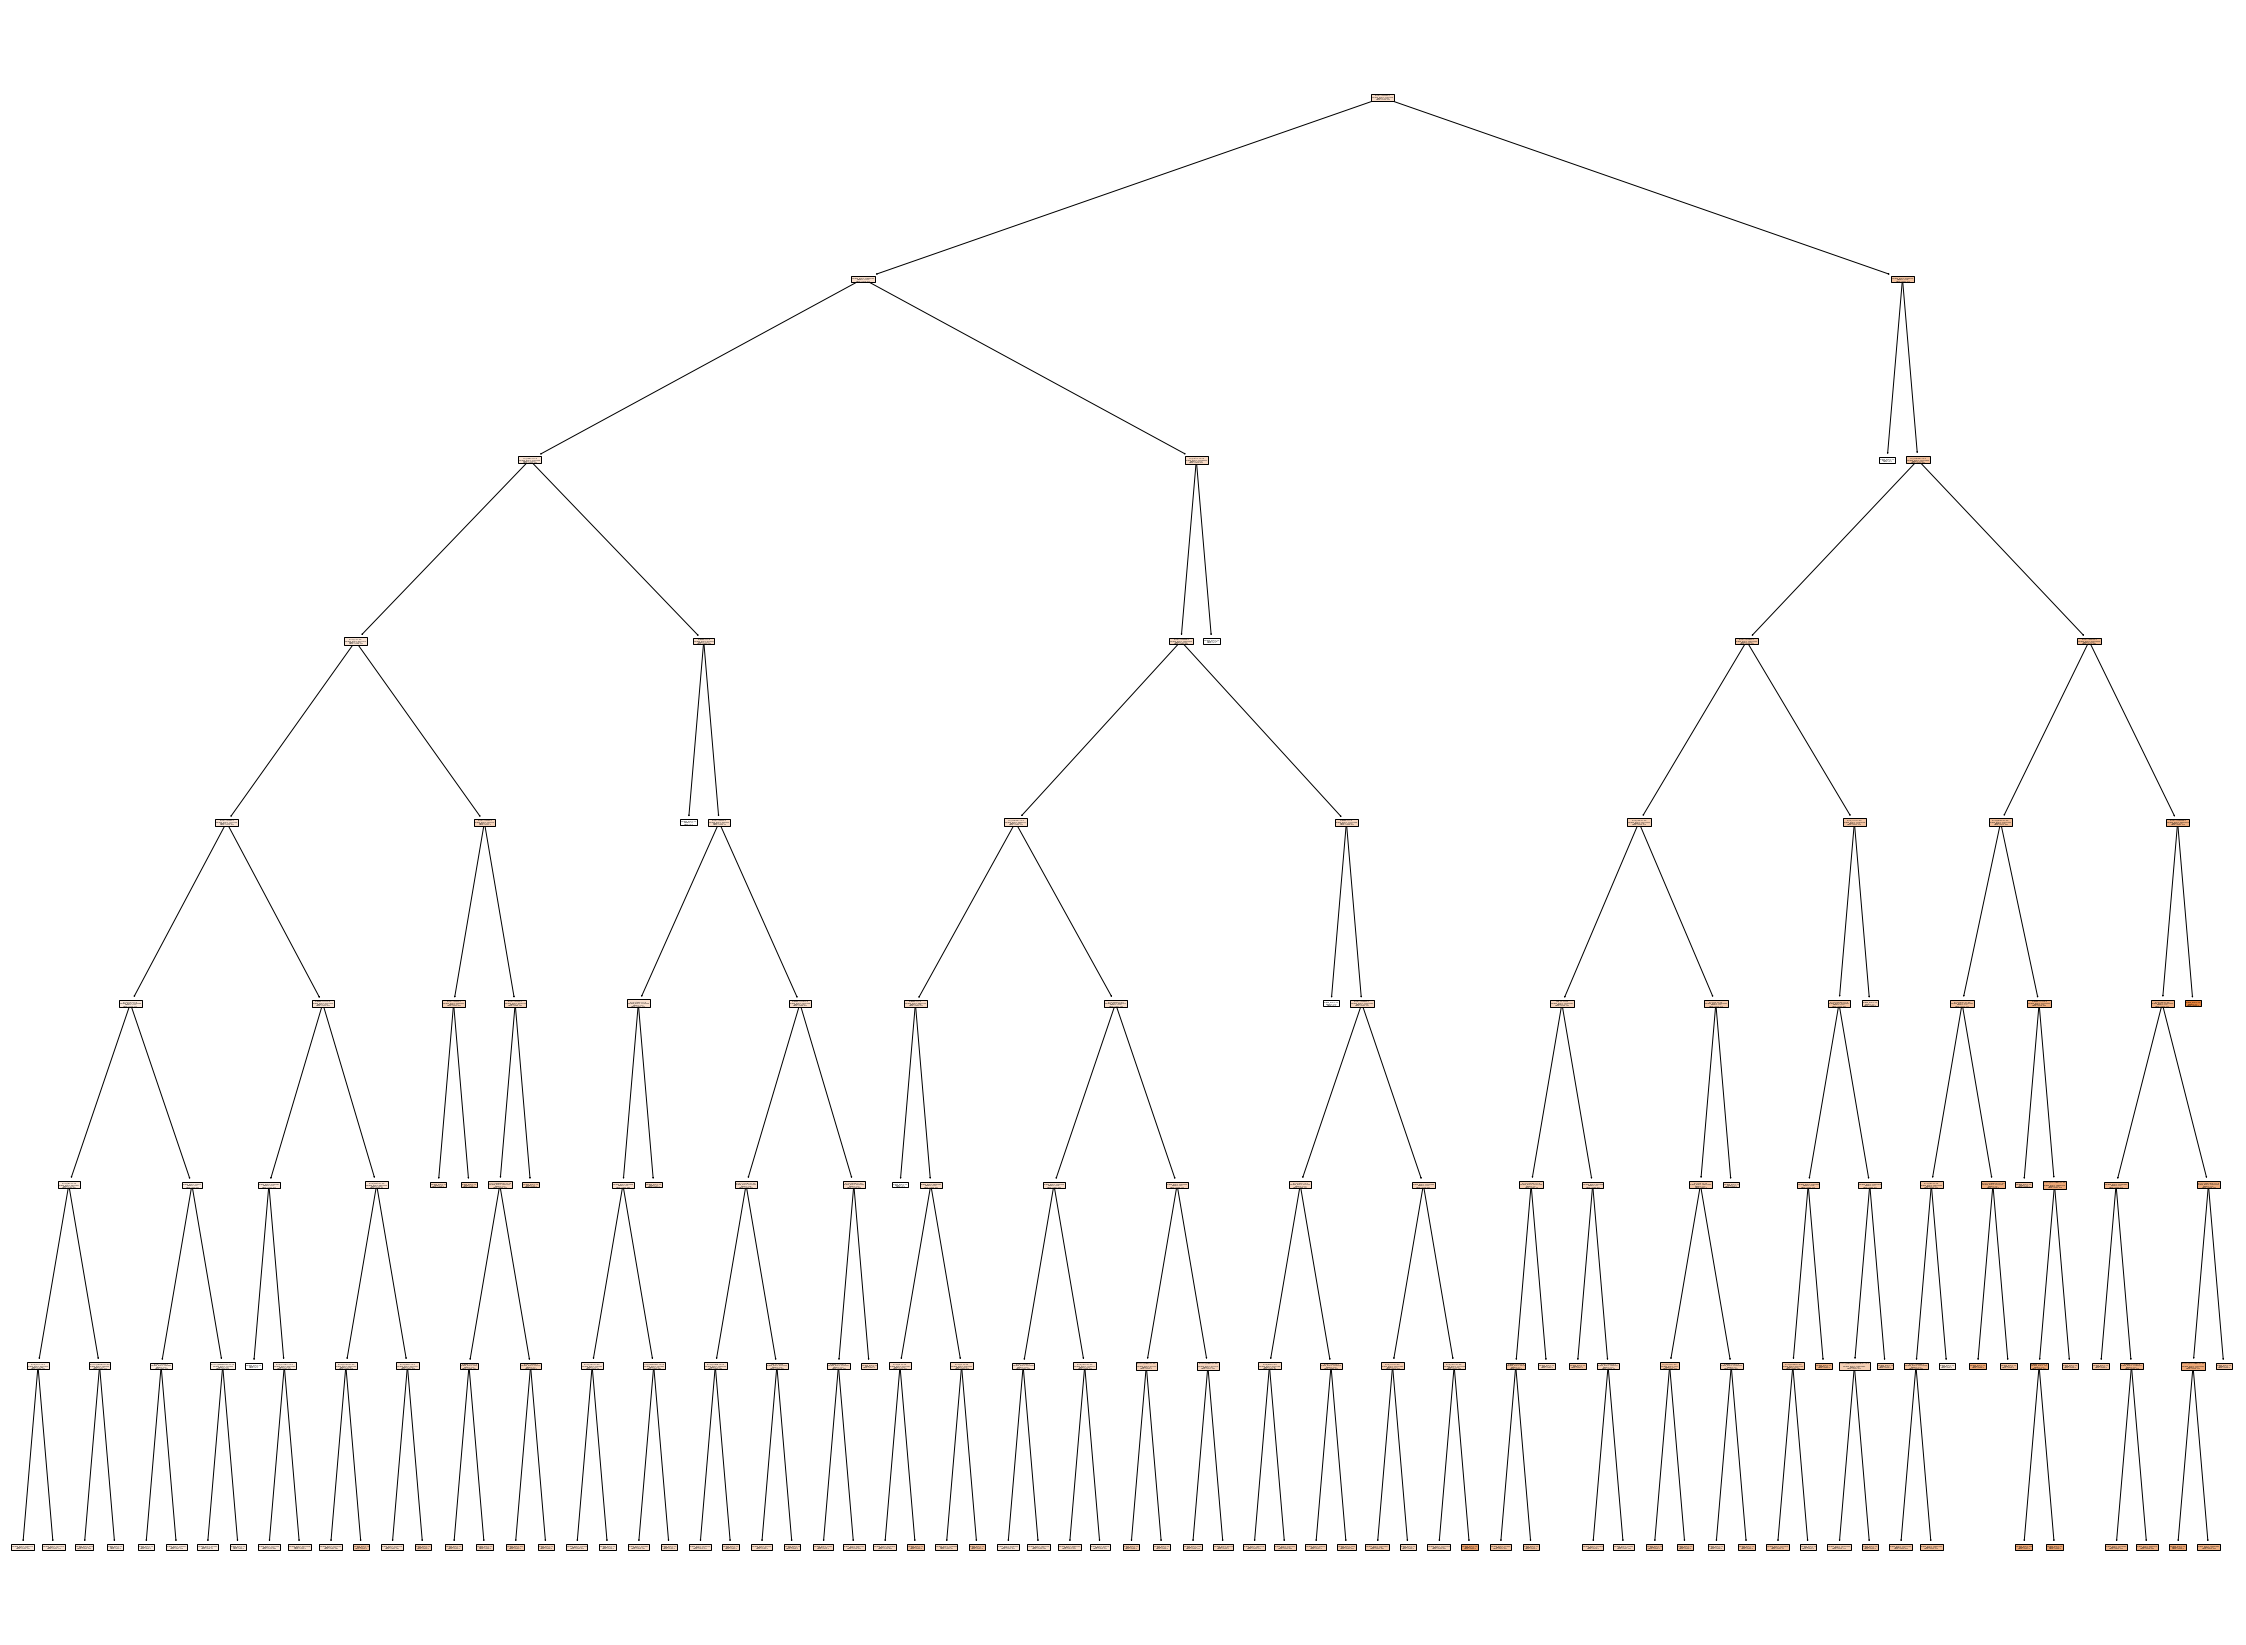

In [72]:
reg1 = tree.DecisionTreeRegressor(max_depth = 8)
reg1.fit(X_train_rg, y_train_rg)
y_pred1_rg = reg1.predict(X_test_rg)
print("Accuracy of the model:", r2_score(y_test_rg, y_pred1_rg))
fig = plt.figure(figsize=(40,30))
_1 = tree.plot_tree(reg1, feature_names=X_rg.columns, class_names=y.astype(str), filled=True)

<b>Thus, the max_depth gave better result. And I want to mention that regression with DSTree showed good result in compare with KNN and SVM regression</b>

<hr>

<h3>Logistic Regression</h3>

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
LReg = LogisticRegression()

In [75]:
LReg = LReg.fit(X_train, y_train)
LReg

LogisticRegression()

In [76]:
y_pred = LReg.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        2019       0.76      0.87      0.81       420
        2020       0.59      0.31      0.41       251
        2021       0.77      0.90      0.83       327

    accuracy                           0.74       998
   macro avg       0.71      0.69      0.68       998
weighted avg       0.72      0.74      0.72       998



Hmm, at this point it gave me nice result as in KNN, SVM and DSTree. Let's now change some parameters

In [78]:
LReg_1 = LogisticRegression(penalty='none')

In [79]:
LReg_1 = LReg_1.fit(X_train, y_train)
LReg_1

LogisticRegression(penalty='none')

In [80]:
y_pred_1 = LReg_1.predict(X_test)

In [81]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

        2019       0.76      0.87      0.81       420
        2020       0.59      0.31      0.41       251
        2021       0.77      0.90      0.83       327

    accuracy                           0.74       998
   macro avg       0.71      0.69      0.68       998
weighted avg       0.72      0.74      0.72       998



So, there is no any changes, let's try something else. I decided to use penalty: l2, because there wasn't any changes with 'none' and I decided to change 'C' and 'solver'

In [82]:
LReg_1 = LogisticRegression(C=3.5, solver='newton-cg')

In [83]:
LReg_1 = LReg_1.fit(X_train, y_train)
LReg_1

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(C=3.5, solver='newton-cg')

In [84]:
y_pred_1 = LReg_1.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

        2019       0.79      0.83      0.81       420
        2020       0.57      0.39      0.46       251
        2021       0.77      0.90      0.83       327

    accuracy                           0.74       998
   macro avg       0.71      0.71      0.70       998
weighted avg       0.73      0.74      0.73       998



<b>Now, we can see that it changed a little</b>

<hr>

<h3>Model Selection (Grid Search)</h3>

In [86]:
from sklearn.model_selection import GridSearchCV

<h4>Grid search with DS Tree classifier</h4>

In [87]:
parameters = {'criterion':('gini', 'entropy'),
              'splitter': ('best', 'random'),
              'max_depth': np.arange(1,10),
              'min_samples_leaf': np.arange(1, 10),
             'min_samples_split': np.arange(2, 10)}

In [88]:
DSTree = tree.DecisionTreeClassifier()

In [89]:
clf = GridSearchCV(DSTree, parameters)

In [90]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ('best', 'random')})

In [91]:
y_pred = clf.predict(X_test)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        2019       0.75      0.85      0.80       420
        2020       0.53      0.46      0.49       251
        2021       0.90      0.84      0.87       327

    accuracy                           0.75       998
   macro avg       0.73      0.72      0.72       998
weighted avg       0.74      0.75      0.74       998



The best parameter is criterion='entropy', max_depth=5, min_samples_leaf=94 let's check it by hand

In [94]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=9)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

        2019       0.75      0.85      0.80       420
        2020       0.53      0.46      0.49       251
        2021       0.90      0.84      0.87       327

    accuracy                           0.75       998
   macro avg       0.73      0.72      0.72       998
weighted avg       0.74      0.75      0.74       998



<b>In conclusion, the result with criterion='entropy', max_depth=5, min_samples_leaf=9 was truly best result and in compare with previous DSTree works accuracy same with the best one, that I found.</b>

<h4>Grid search with Logistic regression classifier</h4>

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
parameters = {'penalty':('l1', 'l2', 'none'), 
              'C':[1, 3, 5, 7],
             'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}

In [97]:
LReg = LogisticRegression()

In [98]:
clf = GridSearchCV(LReg, parameters)

In [99]:
clf.fit(X_train, y_train)

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter wa

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed t

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aaysa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalt

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 3, 5, 7], 'penalty': ('l1', 'l2', 'none'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')})

In [100]:
best_clf = clf.best_estimator_

In [101]:
y_pred = clf.predict(X_test)

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        2019       0.79      0.83      0.81       420
        2020       0.56      0.38      0.45       251
        2021       0.77      0.91      0.83       327

    accuracy                           0.74       998
   macro avg       0.71      0.71      0.70       998
weighted avg       0.73      0.74      0.73       998



In [103]:
best_clf

LogisticRegression(C=1, solver='newton-cg')

<b>In the case with Logistic Regression the best parameters become C=1, solver='newton-cg'. At this point I got accuracy 0.74 less than in DSTree.</b>

<hr>

<h3>Finally:</h3>

><b>Classification</b>

<b>After trying some models I came to the desicion that all models showed good results in classification:</b>

In [104]:
knn = KNeighborsClassifier(n_neighbors=37)
knn.fit(X_train, y_train)
y_preds = knn.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

        2019       0.76      0.84      0.80       420
        2020       0.56      0.41      0.47       251
        2021       0.82      0.87      0.85       327

    accuracy                           0.74       998
   macro avg       0.71      0.71      0.71       998
weighted avg       0.73      0.74      0.73       998



In [105]:
LReg = LogisticRegression()
LReg = LReg.fit(X_train, y_train)
y_pred = LReg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        2019       0.76      0.87      0.81       420
        2020       0.59      0.31      0.41       251
        2021       0.77      0.90      0.83       327

    accuracy                           0.74       998
   macro avg       0.71      0.69      0.68       998
weighted avg       0.72      0.74      0.72       998



<b style="color: red">But, the result with DSTree that was found by GridSearch was the best, because it showed good results even with 2020 that is with a little less in recall, that failing with the detecting given class, and precision, the ability of distinguish this class was good. </b>

In [106]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=9)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

        2019       0.75      0.85      0.80       420
        2020       0.53      0.46      0.49       251
        2021       0.90      0.84      0.87       327

    accuracy                           0.75       998
   macro avg       0.73      0.72      0.72       998
weighted avg       0.74      0.75      0.74       998



><b>Regression</b>

<b style="color: red">The result with regression was the best at DSTree:</b>

In [107]:
reg = tree.DecisionTreeRegressor()
reg = reg.fit(X_train_rg, y_train_rg)
y_pred_rg = reg.predict(X_test_rg)
r2_score(y_test_rg, y_pred_rg)

0.7754786704628801